---


#  🟢 **Disciplina CAT010** - Aplicações dos Satélites em Ciências Atmosféricas


---






## **Aula Prática 6:** $\underline{Analisando\ Dados\ de\ Índice\ de\ Vegetação\ (NDVI)}$
---
**OBJETIVO:** Nesta aula prática aprenderemos como gerar mapas interativos e séries temporais de  *Normalized Difference Vegetation Index* (NDVI) estimado por satélite. Serão utilizados os dados do satélite [TERRA](https://space.oscar.wmo.int/satellites/view/terra) disponibilizados pela plataforma [Google Earth Engine (GEE)](https://earthengine.google.com/).

---


**DADOS DE ENTRADA**: Dados de NDVI do satélite polar TERRA.

- **Acesso aos dados**: [Google Earth Engine (GEE)](https://developers.google.com/earth-engine/datasets/catalog/MODIS_061_MOD13Q1#bands)
- **Período disponível**: 2000-02-18 - presente
- **Resolução espacial**: 250 m
- **Resolução temporal**: 16 dias
- **Satélite:** TERRA
- **Fonte dos dados:** [EARTH DATA](https://www.earthdata.nasa.gov/data/catalog/lpcloud-mod13q1-061)


---


**DADOS DE SAÍDA:** Arquivos de figuras e Netcdf.
- **Arquivos gerados:**
    1. animacao_ndvi_Brasil.jpg
    2. animacao_ndvi_MG.jpg
    3. animacao_ndvi_regiao_selecionada.jpg
    4. ndvi_anual_itajuba.nc
    5. media_anual_itajuba.jpg
    6. anom_anual_itajuba.jpg
    7. media_julho_itajuba.jpg
    8. serie_temporal_ndvi_itajuba.jpg
    9. tabela_ndvi.csv

---

**METODOLOGIA:** Serão abordados os seguintes tópicos:

1.   Mapas interativos com geemap
2.   Animações de mapas
3.   Mapas climatológicos
4.   Séries temporais

---

**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:
1.   Inicializando o GEE
2.   Mapas Interativos com Geemap
3.   Carregando os Dados no Google Earth Engine (GEE)
4.   Plotando Mapa Interativo com Dados
5.   Fazendo Animações
6.   Mapas Climatológicos
7.   Séries Temporais



---
**OBSERVAÇÕES IMPORTANTES**:
1. Criar [conta](https://earthengine.google.com/) no Google Earth Engine. Acessar [vídeo](https://www.youtube.com/watch?v=RuKTG0rHHSw&t=6s) explicando como criar uma conta no GEE e o projeto.

---
- **Realizado por:** Enrique V. Mattos - 23/08/2022
- **Atualizado por:** Enrique V. Mattos - 14/08/2025


---

Colocar uma logo e fazer uma explicação sobre o - Google Earth Engine (GEE)

· Automação da aquisição de imagens: elimine processos manuais e ganhe eficiência;
· Filtragem de nuvens e aprimoramento da qualidade dos dados: técnicas avançadas para melhores resultados;
· Processamento de grandes volumes de dados: utilize a computação em nuvem para análises rápidas e escaláveis.

# **1° Passo:** Inicializando o GEE







---


Este conjunto de comandos tem como objetivo configurar o ambiente para trabalhar com o Google Earth Engine (GEE), uma plataforma poderosa para análise geoespacial em larga escala. Vamos detalhar cada linha e seus argumentos:

---


1. Importação das Bibliotecas Principais: `import ee /
import geemap`

    - `ee`: Módulo principal do Google Earth Engine, que fornece acesso aos dados e funcionalidades de processamento geoespacial.

    - `geemap`: Biblioteca que estende o GEE com ferramentas de visualização interativa, especialmente útil em notebooks Jupyter/Colab.


---


2. Inicialização do Google Earth Engine:  `geemap.ee_initialize(project='ee-enrique', opt_url='https://earthengine-highvolume.googleapis.com')`

    - `geemap.ee_initialize()`: Função que autentica e inicializa a sessão do GEE.

    - `project='ee-enrique'` (opcional): Define o projeto GEE a ser usado (substitua pelo nome do seu projeto).

     - `opt_url`: Especifica o endpoint da API do GEE. Neste caso, usa-se um servidor de alto volume (highvolume) para processamento pesado.


---



In [ ]:
# importando o GEE e Geemap
import ee
import geemap

# inicializando GEE
geemap.ee_initialize(project='ee-enrique', opt_url='https://earthengine-highvolume.googleapis.com')

# **PARTE 1):** Mapas Interativos com Geemap


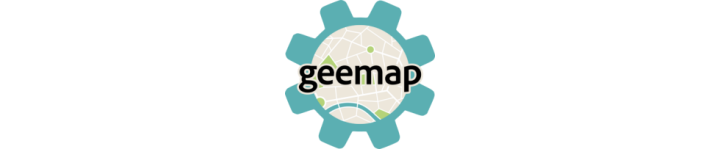

Agora que o nosso acesso ao Google Earth Engine está validado, podemos explorar todo o catálogo do Earth Engine.

Nós vamos fazer isso com uso do pacote [`geemap`](https://github.com/gee-community/geemap), que é um excelente pacote de mapeamento interativo com a API de Python para Earth Engine. Esse é o pacote **essencial** para Earth Engine + Python e foi criado pelo [Dr. Qiusheng Wu](https://geemap.org/), professor do Departamento de Geografia da Universidade de Tennessee. Uma explicação detalhada do Geemap e alguns vídeos clicar [aqui](https://www.youtube.com/watch?v=swjQEE5jpgE&list=PLAxJ4-o7ZoPccOFv1dCwvGI6TYnirRTg3) e [aqui](https://medium.com/@geonextgis/getting-started-with-geemap-a-guide-to-working-with-feature-and-image-collections-dfa438d59621).



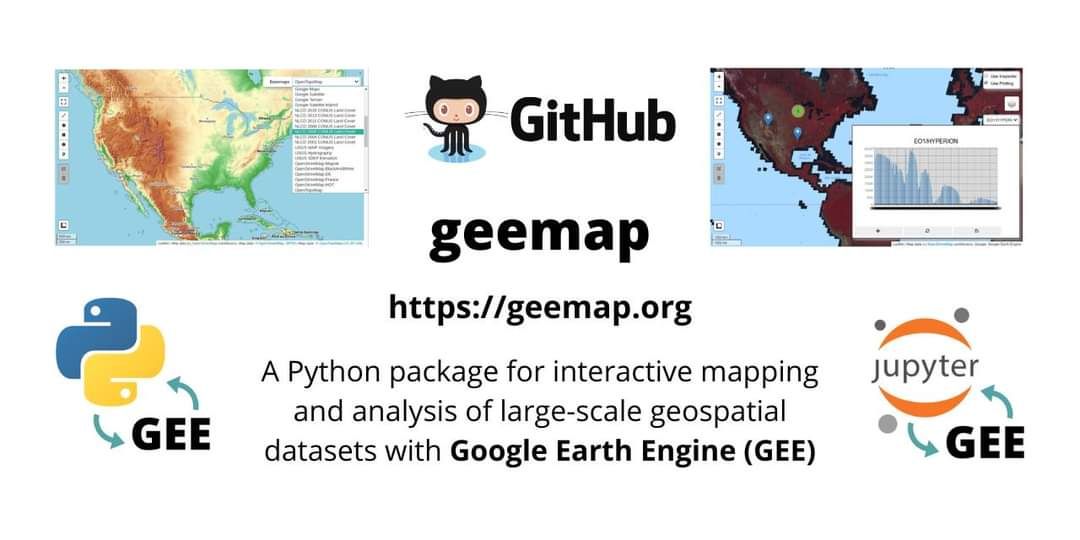

Criando um mapa interativo básico. O geemap tem um objeto chamado `Map` que utilizaremos para crias os mapas inetrativos.

In [ ]:
# mostra o mapa interativo
Map = geemap.Map()
Map

Adiciona mapa de satélite: iremos adicionar um mapa de fundo para o mapa interativo.

In [ ]:
# criando um mapa interativo
Map = geemap.Map()

# adicionando basemap
Map.add_basemap('SATELLITE')

# exibe na tela
Map

Para ver todos os basemaps disponíveis:

In [ ]:
basemaps = geemap.basemaps
print(basemaps.keys())

Centralizando o mapa no Brasil. Para isto utilizaremos os argumentos `center`e o `zoom`.
- `center`: Recebe uma lista com [latitude, longitude]

- `zoom`: Nível de zoom (geralmente entre 1-20, onde valores maiores significam zoom mais próximo)

In [ ]:
# cria o mapa com centro nas coordenadas [latitude, longitude] e zoom inicial
Map = geemap.Map(center=[-14, -55], zoom=4)

# adicionando basemap
Map.add_basemap('SATELLITE')

# exibe na tela
Map

Iremos adicionar uma região de interesse no mapa interativo. O GEE tem uma base de dados dos contornos dos municípios para o mundo todo. Esta base de dados é uma Feature Collection de [nível 2](https://developers.google.com/earth-engine/datasets/catalog/FAO_GAUL_2015_level2). Para selecionar um município em específico utilizaremos o comando Filter e iremos inserir o nome do município (sem acentos).
Neste exemplo queremos analisar o município de Itajubá (MG). Então iremos inserir o nome `Itajuba`.

In [ ]:
# vamos filtrar o conjunto de shapefiles com a função `.filter()` e escolher apenas o município de Itajubá (MG)
itajuba = ee.FeatureCollection('FAO/GAUL/2015/level2').filter(ee.Filter.eq('ADM2_NAME', 'Itajuba'))

In [ ]:
# mostrando a FeatureCollection que contêm o contorno do município de Itajubá
itajuba

Iremos utilizar a função `centerObject` para centralizar nosso mapa em Itajubá. Como argumento iremos inserir a *FeatureCollection* do município de Itajubá e um zoom de valor 11. Além disso, iremos utilizar a função `addLayer` para plotar o contorno de Itajubá no mapa.

In [ ]:
# criando um mapa interativo
Map = geemap.Map()

# centra o mapa na região
Map.centerObject(itajuba, zoom=11)

# adicionando basemap
Map.add_basemap('SATELLITE')

# contorno de itajuba
style = {'color': 'yellow', 'fillColor': '00000000'}
Map.addLayer(itajuba.style(**style), {}, 'itajuba')

# exibe na tela
Map

Vamos aplicar metodologia semelhante para escolher o contorno por Estado. No caso, iremos escolher o Estado de Minas Gerais.

In [ ]:
# vamos filtrar o conjunto de shapefiles com a função `.filter()` e escolher apenas o Estado de MG
mg = ee.FeatureCollection('FAO/GAUL/2015/level1').filter(ee.Filter.eq('ADM1_NAME', 'Minas Gerais'))

In [ ]:
# criando um mapa interativo
Map = geemap.Map()

# centra o mapa na região
Map.centerObject(mg, zoom=6)

# adicionando basemap
Map.add_basemap('SATELLITE')

# contorno de MG
style = {'color': 'yellow', 'fillColor': '00000000'}
Map.addLayer(mg.style(**style), {}, 'MG')

# exibe na tela
Map

Vamos aplicar metodologia semelhante para escolher o contorno do País. No caso, iremos escolher o contorno do Brasil.

In [ ]:
# vamos filtrar o conjunto de shapefiles com a função `.filter()` e escolher apenas o Brasil
brasil = ee.FeatureCollection('FAO/GAUL/2015/level0').filter(ee.Filter.eq('ADM0_NAME', 'Brazil'))

In [ ]:
# criando um mapa interativo
Map = geemap.Map()

# centra o mapa na região
Map.centerObject(brasil, zoom=4)

# adicionando basemap
Map.add_basemap('SATELLITE')

# contorno de itajuba
style = {'color': 'black', 'fillColor': '00000000'}
Map.addLayer(brasil.style(**style), {}, 'Brasil')

# exibe na tela
Map

# **PARTE 2):** Carregando os Dados no Google Earth Engine (GEE)



---


Para carregarmos uma base de dados no GEE precisamos informar o código `Earth Engine Snippet` dos dados. Nesta aula prática utilizaremos os [dados](https://developers.google.com/earth-engine/datasets/catalog/MODIS_061_MOD13Q1) de índice de vegetação do satélite TERRA denominada `MOD13Q1 V6.1 `.

Esta base de dados fornece informações de Normalized Difference Vegetation Index (NDVI) e Enhanced Vegetation Index (EVI). Dados adicionais como refletância e demais informações técnicas do satélite também são fornecidas. Porém iremos utilizar apenas os dados de NDVI. Esses dados possuem frequência temporal de 16 dias e resolução espacial de 250 metros, com período dos dados abrangendo 2020-02-18 ao tempo presente. Maiores informações técnicas sobre estes dados acessar [aqui](https://www.earthdata.nasa.gov/data/catalog/lpcloud-mod13q1-061).

O código Snippet dessa base de dados de índices de vegetação é `MODIS/061/MOD13Q1`. Assim, iremos utilizar a função `ee.ImageCollection` para carregar os dados. Segue abaixo uma explicação de cada uma das funções utilizadas:


---

1. Carregando a Coleção de Imagens: `indices_vegetacao = ee.ImageCollection('MODIS/061/MOD13Q1')`
    - ee.ImageCollection(): Função que acessa uma coleção de imagens no GEE

    - 'MODIS/061/MOD13Q1': Caminho do dataset específico:

        - MODIS: Sensor Terra/Aqua MODIS

        - 061: Versão 6.1 dos dados

        - MOD13Q1: Produto de Índices de Vegetação (16 dias, 250m de resolução)

2. Filtragem Temporal: `.filterDate('2024-01-01', "2025-01-01")`

    - filterDate(): Filtra imagens por intervalo temporal

    - Argumentos:

        - '2024-01-01': Data inicial (formato ISO: YYYY-MM-DD)

        - '2025-01-01': Data final (exclusiva)


3. Filtragem Espacial: `filterBounds(itajuba)`
    - filterBounds(): Filtra imagens que intersectam a geometria especificada

    - itajuba: Objeto ee.Geometry (ponto, polígono ou retângulo) representando a área de interesse

4. Processamento das Imagens: `.map(lambda image: image.multiply(0.0001).copyProperties(image, ['system:time_start']))`
    -.map(): Aplica uma função a cada imagem da coleção

    - Função Lambda:

        - image.multiply(0.0001): Multiplica os valores dos pixels por 0.0001 (os dados MODIS originais são escalonados ×10,000)

        - copyProperties(image, ['system:time_start']): Preserva os metadados originais, especificamente a propriedade de timestamp


---



Iremos carregar os dados para o município de Itajubá (MG) para o completo de 2024. Todas as informações da base de dados carregada será armazenada na variável `indices_vegetacao`.


---




In [ ]:
# carrega os dados
indices_vegetacao = ee.ImageCollection('MODIS/061/MOD13Q1') \
                      .filterDate('2024-01-01', "2025-01-01") \
                      .filterBounds(itajuba) \
                      .map(lambda image: image.multiply(0.0001).copyProperties(image, ['system:time_start']))

In [ ]:
# exibindo os nomes das bandas (=variáveis)
indices_vegetacao.first().bandNames().getInfo()

Essa base de dados fornece 12 bandas (ou variáveis). Iremos utilizar a função `select` e escolher a banda `NDVI`.

In [ ]:
# seleciona a variável "NDVI"
ndvi = indices_vegetacao.select('NDVI')
ndvi

In [ ]:
# quantidade de imagens da coleção
ndvi.size()

In [ ]:
# transforma as datas para o formato "ano-mes-dia hora:minuto"
ndvi_2 = ndvi.map(lambda img: img.set( {"DATE": ee.Date(img.get("system:time_start")).format("YYYY-MM-dd hh:mm")}))

print(ndvi_2.aggregate_array("DATE").getInfo())

In [ ]:
# exibindo as propriedades da PRIMEIRA imagem
propriedades_imagem = geemap.image_props(ndvi.first())
propriedades_imagem.getInfo()

O atributo `NOMINAL_SCALE` nos metadados do satélite Terra (especificamente para o produto MODIS) refere-se à resolução espacial nominal do dado, expressa em metros por pixel. Isto significa que cada pixel da imagem representa uma área de aproximadamente 231.65 metros × 231.65 metros no terreno.

O produto MODIS MOD13Q1 (Índices de Vegetação) tem resolução nominal de 250m. O valor 231.656, aparece porque é a resolução real projetada para a grade sinusoidal do MODIS (projeção específica do sensor) e corresponde a ~250m na projeção original, mas convertido para metros em WGS84 (EPSG:4326)

# **PARTE 3):** Plotando Mapa Interativo com Dados

Nesta etapa iremos plotar os dados nos mapas interativos. Existem diversas maneiras que podemos plotar os nossos mapas interativos com o geemap. Plotaremos os seguintes mapas:

 - Mapa interativo simples com uma camada para o Brasil, Estado de MG ou  Itajubá
 - Mapa formado por quatro painéis, usando a função [`linked_maps`](https://geemap.org/notebooks/70_linked_maps/).
 - Mapa utilizando a função [`split Map`](https://geemap.org/notebooks/04_split_panel_map/).
 - Mapa simples de anomalia de NDVI.

## Mapa simples com dados

Iremos carregar a função *colormaps* do [geemap](https://geemap.org/notebooks/60_colormaps/) que contêm diversas paletas de cores.
Para plotarmos o NDVI o geemap possui uma paleta de cores pronta denominada `cm.palettes.ndvi`. Porém, visualmente a paleta `cm.palettes.RdYlGn` é melhor para indentificar as discrepâncias nos valores de NDVI que aparecem numa imagem. Então utilizaremos esta paleta de cores. Veja diversas opções de colormap [aqui](https://courses.geemap.org/gee_intro/Image/image_colorbar/#colormap).

In [ ]:
# importar módulo de paleta de cores
import geemap.colormaps as cm

In [ ]:
# acessando as cores da paleta "RdYlGn"
cm.palettes.RdYlGn

In [ ]:
# acessando as cores da paleta "ndvi"
cm.palettes.ndvi

In [ ]:
# acessando as opções de paleta de cores do geemap
cm.list_colormaps()

In [ ]:
# exbindo as opções de colormaps em formato de barra de cores
cm.plot_colormaps(width=12, height=0.4)

Mapa para o Brasil.

A função `median` gera um mapa com o valor mediano (P50%) considerando o período de dados. Já a função [`clip`](https://developers.google.com/earth-engine/apidocs/ee-image-clip?hl=pt-br) recorta os dados para a região de interesse, no nosso caso para o território do Brasil.

In [ ]:
# cria a moldura do mapa
Map = geemap.Map()

# centraliza o mapa na região
Map.centerObject(brasil, zoom=4)

# parâmetros da visualização
param_vis = {'min': 0, 'max': 1, 'palette': cm.palettes.RdYlGn, 'bands': 'NDVI'}

# contorno do Brasil
Map.addLayer(brasil, {}, 'Contorno_Brasil')

# mapa da mediana do NDVI
Map.addLayer(ndvi.median().clip(brasil), param_vis, 'NDVI')

# barra de cores
Map.add_colorbar(param_vis, label='NDVI', orientation='vertical')

# exibe na tela
Map

Mapa para o Estado de Minas Gerais

In [ ]:
# cria a moldura do mapa
Map = geemap.Map()

# centraliza o mapa na região
Map.centerObject(mg, zoom=6)

# parâmetros da visualização
param_vis = {'min':0, 'max':1, 'palette': cm.palettes.RdYlGn, 'bands': 'NDVI'}

# contorno do Estado de MG
Map.addLayer(mg, {}, 'Contorno_MG')

# mapa da mediana do NDVI
Map.addLayer(ndvi.median().clip(mg), param_vis, 'NDVI')

# barra de cores
Map.add_colorbar(param_vis, label='NDVI', orientation='vertical')

# exibe na tela
Map

Mapa para o município de Itajubá

In [ ]:
# cria a moldura do mapa
Map = geemap.Map()

# centra o mapa na região
Map.centerObject(itajuba, zoom=11)

# parâmetros da visualização
param_vis = {'min':0, 'max':1, 'palette': cm.palettes.RdYlGn, 'bands': 'NDVI'}

# contorno do município de Itajubá
Map.addLayer(itajuba, {}, 'Contorno_Itajuba')

# mapa da mediana do NDVI
Map.addLayer(ndvi.median().clip(itajuba), param_vis, 'NDVI')

# barra de cores
Map.add_colorbar(param_vis, label='NDVI', orientation='vertical')

# exibe na tela
Map

## Sazonalidade: linked_maps - 4 painéis

O que fizemos acima foi simplesmente calcular a mediana do período **inteiro** dos dados de NDVI. Embora seja útil, não estamos levando em conta as variações **sazonais** da vegetação e do índice, que também são muito importantes se quisermos entender o comportamento da vegetação e de culturas agrícolas ao longo do ano.

Vamos analisar essa sazonalidade do NDVI com as medianas do índice nas quatro estações do ano:

* **Verão:**  Dezembro, Janeiro e Fevereiro
* **Outono:** Março, Abril e Maio
* **Inverno:** Junho, Julho e Agosto
* **Primavera:** Setembro, Outubro e Novembro

Para isto iremos utilizar os dados de 2010 à 2023. Lembre-se que o última data no python não é inclusa. Então quando inserimos o período `.filterDate('2010', "2024")`, será carregado os dados de 2010 à 2023, ou seja o ano de 2024 embora esteja na função ele não será carregado.  

In [ ]:
# carrega os dados
ndvi = ee.ImageCollection('MODIS/061/MOD13Q1') \
         .filterDate('2010', "2024") \
         .filterBounds(itajuba) \
         .select('NDVI') \
         .map(lambda image: image.multiply(0.0001).copyProperties(image, ['system:time_start']))

# quantidade de imagens da coleção
ndvi.size()

In [ ]:
# mostrando as informações das imagens que foram carregadas
ndvi

Selecionando as imagens por estação do ano. Para isto utilizaremos a função `ee.Filter.calendarRange(mês inicial, mês final, 'month')`. Por exemplo para o verão utilizaremos os meses 12 (dezembro), 1 (janeiro) e 2 (fevereiro), então a função ficará: `Filter.calendarRange(12, 2, 'month')`. Assim acabamos de selecionar todos os meses de `dezembro`, `janeiro` e `fevereiro` entre 2010 e 2023.

In [ ]:
# selecionando as imagens por estação do ano: VERÃO
verao = ndvi.filter(ee.Filter.calendarRange(12, 2, 'month'))

In [ ]:
# selecionando as imagens por estação do ano: OUTONO
outono = ndvi.filter(ee.Filter.calendarRange(3, 5, 'month'))

In [ ]:
# selecionando as imagens por estação do ano: INVERNO
inverno = ndvi.filter(ee.Filter.calendarRange(6, 8, 'month'))

In [ ]:
# selecionando as imagens por estação do ano: PRIMAVERA
primavera = ndvi.filter(ee.Filter.calendarRange(9, 11, 'month'))

Agora temos quatro coleções de imagens diferentes, uma para cada estação do ano. Vamos calcular as suas **medianas** `.median()` e mostrar em um mapa interativo um pouco diferente, em forma de um painel de duas linhas e duas colunas com a função [`.linked_maps()`](https://geemap.org/geemap/#geemap.geemap.linked_maps) do `geemap`. Exemplo do uso do [linked_maps()](https://geemap.org/notebooks/70_linked_maps/).

In [ ]:
# parâmtros de visualização
param_vis = {'min': 0, 'max': 1, 'palette': cm.palettes.RdYlGn}

In [ ]:
# monta painel com 4 mapas
geemap.linked_maps(rows = 2,
                   cols = 2,
                   height = "300px",
                   center = [-22.4258, -45.4556],
                   zoom = 10.5,
                   ee_objects = [verao.select('NDVI').median().clip(itajuba),
                                 outono.select('NDVI').median().clip(itajuba),
                                 inverno.select('NDVI').median().clip(itajuba),
                                 primavera.select('NDVI').median().clip(itajuba)],
                   vis_params = [param_vis, param_vis, param_vis, param_vis],
                   labels = ['Verão', 'Outono', 'Inverno', 'Primavera'],
                   label_position = "topright")

Os `.linked_maps()` dependem muito de listas. Por exemplo, como criamos um painel com 2 linhas e 2 colunas, precisamos de 4 elementos para o argumento `ee_objects` e 4 dicionários com parâmetros de visualização em `param_vis`.

Podemos ver que os `.linked_maps()` são úteis quando queremos comparar várias imagens de uma vez só, em contextos diferentes ou não. Você poderia criar um painel com 4 índices espectrais de vegetação diferentes, em vez da análise sazonal que fizemos, por exemplo.

Vimos no exemplo acima que há uma evidente sazonalidade do NDVI no município de Itajubá, muito ligada a variáveis climáticas como precipitação e temperatura, mas também temos que considerar o comportamento da própria cultura agrícola.

## Antes e Depois: Split Map

Outro tipo de mapa interativo possível de ser criado com `geemap` é o chamado [**split map**](https://geemap.org/geemap/#geemap.geemap.Map.split_map), que nada mais é que um painel que mostra duas imagens diferentes de uma única vez. Veja um exemplo [aqui](https://geemap.org/notebooks/04_split_panel_map/).


Vamos usar esse tipo de mapa para comparar o mapa de NDVI de `janeiro de 2023` e `janeiro de 2024` para o município de Itajubá.



Carregando os dados

In [ ]:
# data de início e fim
data_ini = '2014-01-01'
data_fim = '2025-01-01'

# carrega os dados
ndvi = ee.ImageCollection('MODIS/061/MOD13Q1') \
         .filterDate(data_ini, data_fim) \
         .filterBounds(itajuba) \
         .select('NDVI') \
         .map(lambda image: image.multiply(0.0001).copyProperties(image, ['system:time_start']))

Extraindo a data das imagens

In [ ]:
# importa o pandas
import pandas as pd

# transforma para ano-mes-dia hora:minuto e extrae os valores
ndvi_2 = ndvi.map(lambda img: img.set( {"DATE": ee.Date(img.get("system:time_start")).format("YYYY-MM-dd hh:mm")}))

# supondo que você já tenha a lista de datas
dates_list = ndvi_2.aggregate_array("DATE").getInfo()

# criar o DataFrame
df_dates = pd.DataFrame({'DATE': dates_list})

# mostrar as primeiras linhas
df_dates

Agregando para a escala mensal. Estamos trabalhando com imagens de 2014 à 2024, sendo que cada mês possui duas imagens (`Lembre-se`: a resolução temporal desse produto é de 16 dias). Como iremos comparar as imagens dos meses, teremos que realizar um agrupamento das imagens para cada mês e depois calcular o valor máximo de NDVI das imagens de um mesmo mês.

In [ ]:
# função auxiliar para obter o primeiro dia de cada mês
def gerar_lista_meses(data_ini, data_fim):

    ini = ee.Date(data_ini)
    fim = ee.Date(data_fim)

    def gera_datas(n):
        return ini.advance(n, 'month')

    n_meses = fim.difference(ini, 'month').round()
    return ee.List.sequence(0, n_meses.subtract(1)).map(gera_datas)

# função para calcular a média mensal
def media_mensal(data):

    # data atual
    data = ee.Date(data)

    # data do próximo mês
    prox_mes = data.advance(1, 'month')

    # filtra o período considerando o mês atual
    colecao_mes = ndvi.filterDate(data, prox_mes)

    # calcula a média para o período
    media = colecao_mes.max().set({'system:time_start': data.millis(), 'mes': data.format('YYYY-MM')})

    return media

In [ ]:
# gera a data inicial e final de cada mês
datas_mensais = gerar_lista_meses(data_ini, data_fim)
datas_mensais

In [ ]:
# cria a ImageCollection com imagens mensais
ndvi_mensal = ee.ImageCollection(datas_mensais.map(media_mensal))
ndvi_mensal

Despois de realizado a agregação, as datas das imagens estão por mês.

In [ ]:
# importa o pandas
import pandas as pd

# transforma para ano-mes-dia hora:minuto e extrae os valores
ndvi_mensal_2 = ndvi_mensal.map(lambda img: img.set( {"DATE": ee.Date(img.get("system:time_start")).format("YYYY-MM-dd hh:mm")}))

# Supondo que você já tenha a lista de datas
dates_list = ndvi_mensal_2.aggregate_array("DATE").getInfo()

# Criar o DataFrame
df_dates = pd.DataFrame({'DATE': dates_list})

# Mostrar as primeiras linhas
df_dates

Agora, vamos conseguir criar o nosso novo mapa interativo com a função `.split_map()` do `geemap`. Essa função precisa de dois argumentos principais:
  - `left_layer()`: imagem que ficará na parte esquerda do mapa
  - `right_layer()`: imagem que ficará na parte direita do mapa

Além disso, as duas camadas vão precisar invocar a função `.geemap.ee_tile_layer()`. Vamos entender como funciona:

In [ ]:
# seleciona os dados de Janeiro de 2023
ndvi_jan23 = ndvi_mensal.filterDate('2023-01-01').median().clip(itajuba)

In [ ]:
# seleciona os dados de Janeiro de 2024
ndvi_jan24 = ndvi_mensal.filterDate('2024-01-01').median().clip(itajuba)

In [ ]:
# cria o objeto "Map"
Map = geemap.Map()

# centra o mapa na região
Map.centerObject(itajuba, zoom=11)

# adicionar um basemap
Map.add_basemap('SATELLITE')

# criar o mapa interativo
Map.split_map(left_layer=geemap.ee_tile_layer(ndvi_jan23, param_vis, 'Janeiro de 2023'),
              right_layer=geemap.ee_tile_layer(ndvi_jan24, param_vis, 'Janeiro de 2024'))

# exibe na tela
Map

## Anômalia: mês_atual - média

Iremos calcular a anomalia de NDVI para o mês de Julho de 2023. Lembre-se a anomalia é a diferença entre o valor e a média. No nosso caso, será a diferença entre o valor de NDVI de julho de 2023 e a média do NDVI considerando todos os meses Julhos (2014 à 2024).

In [ ]:
# julho de 2023
ndvi_jul23 = ndvi.filterDate('2023-07-01', '2023-08-01')

In [ ]:
# filtragem somente para os JULHOS de todos os anos (desde 2014)
todos_julhos = ndvi.filter(ee.Filter.calendarRange(7, 7, 'month'))

In [ ]:
# calcula o valor MÉDIO para o mês de JULHO
media_julho = todos_julhos.mean()

In [ ]:
# cálculo do desvio em relação a média histórica
desvio = ndvi_jul23.mean().subtract(media_julho)

In [ ]:
# cria a moldura do mapa
Map = geemap.Map()

# adicionar um basemap
Map.add_basemap('SATELLITE')

# centra o mapa na região
Map.centerObject(itajuba, zoom=11)

# parâmetros de visualização
desvio_viz = {'min': -0.4, 'max': 0.4, 'palette': cm.palettes.BrBG}

# contorno de Guaxupé
Map.addLayer(itajuba, {}, 'Guaxupé - MG')

# adicionar camada
Map.addLayer(desvio.select('NDVI').clip(itajuba),
             desvio_viz,
             'Depois')

# adicionar barra de cores
Map.add_colorbar(desvio_viz,
                 label='Variação de NDVI',
                 orientation='vertical')
# exibe o mapa
Map

A cor verde no mapa mostra um desvio positivo do NDVI em relação a média histórica, com algumas poucas exceções, dominando toda a área do municpío de Itajubá.



# **PARTE 4):** Fazendo animações

Faremos timelapse de imagens de NDVI geradas pelo sensor MODIS do satélite AQUA e TERRA. Para isto usaremos a função do [geemap](https://geemap.org/) chamada [**.modis_ndvi_timelapse**](https://geemap.org/timelapse/#geemap.timelapse.modis_ndvi_timelapse). Maiores informações pode ser encontrada acessando [aqui](https://book.geemap.org/chapters/09_timelapse.html#modis-timelapse).

Esse código do Geemap é adaptado do código original do GEE [MODIS NDVI Times Series Animation](https://developers.google.com/earth-engine/tutorials/community/modis-ndvi-time-series-animation).

Time Lapse de NDVI para o Brasil

In [ ]:
# gera timelapse
timelapse = geemap.modis_ndvi_timelapse(brasil,
                                        out_gif='/content/animacao_ndvi_Brasil.gif',
                                        data='Terra',
                                        band='NDVI',
                                        start_date='2000-01-01',
                                        end_date='2024-12-31',
                                        frames_per_second=40,
                                        title='MODIS NDVI Timelapse',
                                        overlay_data='countries',
                                        progress_bar_color='yellow')

# mostra o timelapse na tela
geemap.show_image(timelapse)

Time Lapse de NDVI para o Estado de Minas Gerais

In [ ]:
# gera timelapse
timelapse = geemap.modis_ndvi_timelapse(mg,
                                        out_gif='/content/animacao_ndvi_MG.gif',
                                        data='Terra',
                                        band='NDVI',
                                        start_date='2000-01-01',
                                        end_date='2024-12-31',
                                        frames_per_second=40,
                                        title='MODIS NDVI Timelapse',
                                        overlay_data='countries',
                                        progress_bar_color='yellow')

# mostra timelapse na tela
geemap.show_image(timelapse)

Time Lapse de NDVI para uma região escolhida no mapa interativo:  
1.   Rode a célula de código a seguir com `CTRL + ENTER`
2.   Selecione uma região no mapa que foi gerado. Para isto escolha os ícones de geometria que estão do lado esquerdo do mapa e desenhe um polígono no mapa



In [ ]:
Map = geemap.Map(basemap = 'SATELLITE')
Map

In [ ]:
# captura as coordenadas traçadas no mapa
roi = Map.user_roi
roi

In [ ]:
# plota região no mapa
Map = geemap.Map(basemap = 'SATELLITE')
Map.centerObject(roi, 4)
Map.addLayer(roi)
Map

In [ ]:
# gera timelapse
timelapse = geemap.modis_ndvi_timelapse(roi,
                                        out_gif='/content/animacao_ndvi_regiao_selecionada.gif',
                                        data='Terra',
                                        band='NDVI',
                                        start_date='2000-01-01',
                                        end_date='2024-12-31',
                                        frames_per_second=40,
                                        title='MODIS NDVI Timelapse',
                                        overlay_data='countries',
                                        progress_bar_color='yellow')

# mostra timelapse
geemap.show_image(timelapse)

# **PARTE 5):** Mapas Climatológicos

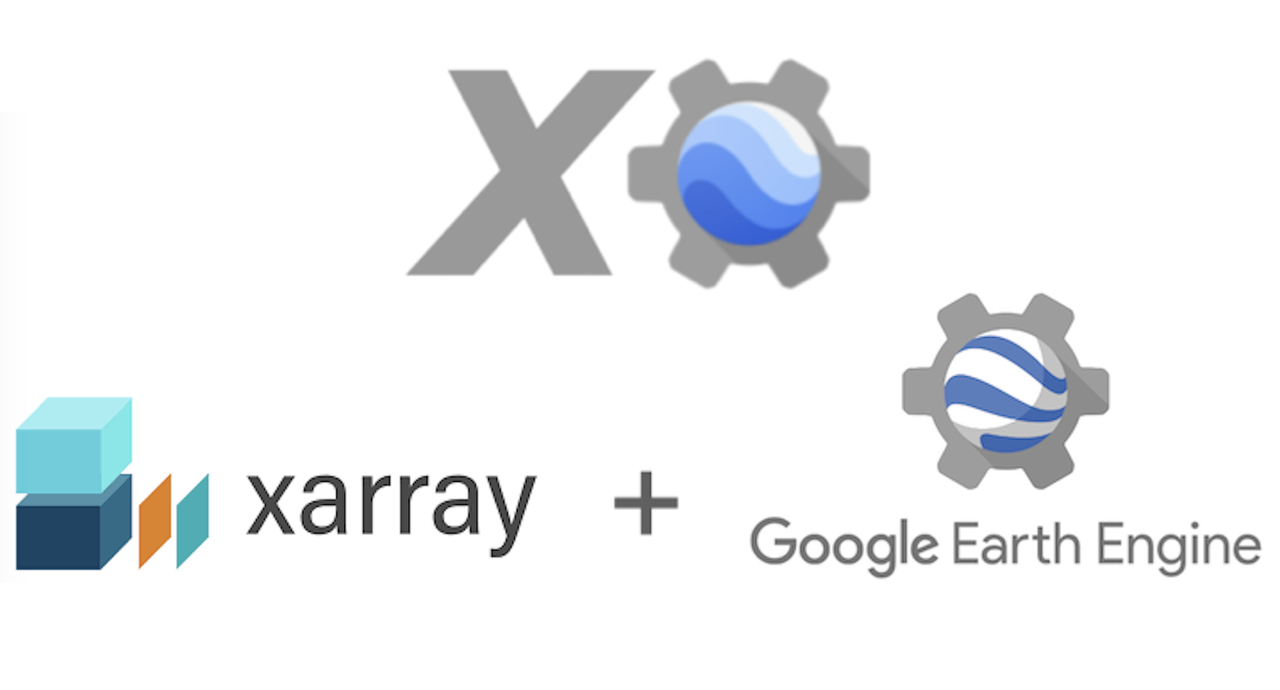

A bilioteca [XEE](https://github.com/google/Xee) foi criada em 2023 e tem como objetivo ser uma extensão do [Xarray](https://docs.xarray.dev/en/stable/) aplicada ao Google Earth Engine (GEE). A biblioteca possibilita transformar as coleções de imagens do GEE para DataSet do Array. Assim, conseguimos trabalhar e aplicar todas as funcionalidades que temos no Xarray nos dados do GEE.  

Benefícios desta abordagem:


---


1. Combina a capacidade de processamento em nuvem do GEE com a interface conveniente do Xarray

2. Permite usar todas as funcionalidades do Xarray (slicing, operações matemáticas, plotagem) em dados do GEE

3. Facilita a integração com o ecossistema Python para análise de dados

In [ ]:
# instalando XEE
!pip install -q xee

In [ ]:
# importando XEE
import xee

Selecionando região de forma interativa no Mapa. Clicar no mapa e depois rodar essa célula de código

In [ ]:
# mapa interativo com geemap
Map = geemap.Map(basemap='SATELLITE')
Map

In [ ]:
# selecionando região de forma interativa no Mapa. Clicar no mapa e depois rodar essa célula de código
roi = Map.draw_last_feature.geometry()
roi

In [ ]:
# Brasil
#roi = ee.FeatureCollection('FAO/GAUL/2015/level0').filter(ee.Filter.eq('ADM0_NAME', 'Brazil')).geometry()

# Estado de Minas Gerais: em "geometry" usar geometry=roi.geometry()
#roi = ee.FeatureCollection('FAO/GAUL/2015/level1').filter(ee.Filter.eq('ADM1_NAME', 'Minas Gerais')).geometry()

# Cidade de Itajubá
roi = ee.FeatureCollection('FAO/GAUL/2015/level2').filter(ee.Filter.eq('ADM2_NAME', 'Itajuba')).geometry()

# Quadrado
#roi = ee.Geometry.Rectangle([-47.1, -21.1, -44.2, -20.4]) # [xmin, ymin, xmax, ymax] ou [oeste, sul, leste, norte].

# Ponto com buffer de 10.000 metros
#roi = ee.Geometry.Point([-44.0, -19.0]).buffer(10000) # (longitude, latitude) com buffer de 10.000 metros

# mostra as latitudes/longitudes limitantes da região
roi

Carrega os dados

In [ ]:
ndvi = ee.ImageCollection('MODIS/061/MOD13Q1') \
         .filterDate('2015', '2025') \
         .filterBounds(roi) \
         .select('NDVI') \
         .map(lambda image: image.multiply(0.0001).copyProperties(image, ['system:time_start']))

Converte para Dataset. Para converter a ImageCollection do GEE em DataSet do xarray utilizaremos o xarray, e especificamente a função `.open_dataset`, que serve para abrir um dataset multidimensional. Neste caso, está utilizaremos além disso uma engine especial para o Google Earth Engine.

*Argumentos utilizados:*



---


`engine='ee'`:

Especifica que o Xarray deve usar o engine do Google Earth Engine para carregar os dados.

Isso requer que a biblioteca ee (Earth Engine) esteja instalada e autenticada.


---


`crs='EPSG:4326'`:

Define o sistema de referência de coordenadas (CRS) para os dados.

EPSG:4326 é o código para WGS84 (coordenadas geográficas em latitude/longitude).

Isso garante que os dados serão projetados corretamente.


---


`scale=0.00250`:

Define a resolução espacial em graus para os dados (aproximadamente 250 metros no equador).

No GEE, a escala determina o tamanho do pixel na reprojeção.

Valores menores significam maior resolução.


---


`geometry=roi`:

Especifica a região de interesse (ROI) para recortar os dados.

A roi deve ser um objeto geográfico (como um polígono) com um método geometry().

Isso limita a extração de dados apenas à área especificada.


---



In [ ]:
# importando o xarray
import xarray as xr

In [ ]:
# transformando para dataset do xarray
ds_ndvi = xr.open_dataset(ndvi,
                          engine = 'ee',
                          crs = 'EPSG:4326',
                          scale = 0.00250,
                          geometry = roi)
# mostrando os dados
ds_ndvi

In [ ]:
# mostra a variável tempo
ds_ndvi.time

Para os cálculos a seguir utilizaremos a importantíssima e bem conhecida função de agrupamento do xarray chamada `.groupby`. Os dados de NDVI estão com frequência temporal de 16 dias e iremos agrupá-los para escala anual.

In [ ]:
# média anual do NDVI
ds_ndvi_anual = ds_ndvi.groupby('time.year').mean('time')
ds_ndvi_anual

In [ ]:
# salva arquivos em formato NetCDF
!pip install -q netcdf4
ds_ndvi_anual.to_netcdf('ndvi_anual_itajuba.nc')

In [ ]:
# abrindo o arquivo que foi salvo
ds_ndvi_gerado = xr.open_dataset('ndvi_anual_itajuba.nc')
ds_ndvi_gerado

In [ ]:
# importando o matplotlib
import matplotlib.pyplot as plt  # Biblioteca fundamental para visualização de dados em Python (criação de gráficos)

In [ ]:
# plota mapa de ndvi anual
ds_ndvi_anual['NDVI'].plot(x = 'lon',
                           y = 'lat',
                           col = 'year',
                           robust = True,
                           col_wrap = 5,
                           cmap = 'RdYlGn')

# salva figura
plt.savefig('media_anual_itajuba.png', dpi=300, bbox_inches='tight')

In [ ]:
# calcula a anomalia anual
ds_ndvi_anual_anomalia = ds_ndvi_anual - ds_ndvi_anual.mean('year')
ds_ndvi_anual_anomalia

In [ ]:
# plota mapa de anomalia média anual
ds_ndvi_anual_anomalia['NDVI'].plot(x = 'lon',
                                    y = 'lat',
                                    col = 'year',
                                    robust = True,
                                    col_wrap = 5,
                                    cmap = 'RdYlGn')

# salva figura
plt.savefig('anom_anual_itajuba.png', dpi=300, bbox_inches='tight')

Imagine que gostaríamos de avaliar como o NDVI do mês de Julho varia ao longo dos anos. Então iremos agrupar os dados para o mês de Julho. Faremos os seguintes passos:


1.   Selecionar apenas os meses de julho da série histórica de 2015 à 2024
2.   Agrupar os meses de julho de cada ano
3.   Calcular o NDVI médio para o mês de julho de cada ano



In [ ]:
# Agrupar por ano e depois selecionar janeiro
media_julho_por_ano = (ds_ndvi.sel(time=ds_ndvi['time'].dt.month == 7)  # Filtra janeiro
                              .groupby('time.year')                     # Agrupa por ano
                              .mean(dim='time'))                        # Média ao longo do tempo
print(media_julho_por_ano)

In [ ]:
# plota mapa de ndvi anual
media_julho_por_ano['NDVI'].plot(x = 'lon',
                                 y = 'lat',
                                 col = 'year',
                                 robust = True,
                                 col_wrap = 5,
                                 cmap = 'RdYlGn')

# salva figura
plt.savefig('media_julho_itajuba.png', dpi=300, bbox_inches='tight')

# **PARTE 6):** Séries Temporais

Define a região de estudo

In [ ]:
# visualização no mapa
Map = geemap.Map(basemap='SATELLITE')
Map

In [ ]:
# selecionando região de forma interativa no Mapa. Clicar no mapa e depois rodar essa célula de código
roi = Map.draw_last_feature.geometry()
roi

In [ ]:
# Brasil
#roi = ee.FeatureCollection('FAO/GAUL/2015/level0').filter(ee.Filter.eq('ADM0_NAME', 'Brazil')).geometry()

# Estado de Minas Gerais: em "geometry" usar geometry=roi.geometry()
#roi = ee.FeatureCollection('FAO/GAUL/2015/level1').filter(ee.Filter.eq('ADM1_NAME', 'Minas Gerais')).geometry()

# Cidade de Itajubá
roi = ee.FeatureCollection('FAO/GAUL/2015/level2').filter(ee.Filter.eq('ADM2_NAME', 'Itajuba')).geometry()

# Quadrado
#roi = ee.Geometry.Rectangle([-47.1, -21.1, -44.2, -20.4]) # [xmin, ymin, xmax, ymax] ou [oeste, sul, leste, norte].

# Ponto com buffer de 10.000 metros
#roi = ee.Geometry.Point([-44.0, -19.0]).buffer(10000) # (longitude, latitude) com buffer de 10.000 metros

# mostra as latitudes/longitudes limitantes da região
roi

Carrega os dados

In [ ]:
# carrega os dados
ndvi = ee.ImageCollection('MODIS/061/MOD13Q1') \
         .filterDate('2015', '2025') \
         .filterBounds(roi) \
         .select('NDVI') \
         .map(lambda image: image.multiply(0.0001).copyProperties(image, ['system:time_start']))

# quantidade de imagens da coleção
ndvi.size()

Extrai a série temporal

In [ ]:
# função para extrair a série temporal média
def extrair_serie_temporal(colecao, regiao, escala=250):

    def processar_imagem(imagem):

        data = ee.Date(imagem.get('system:time_start')).format('YYYY-MM-dd')

        ndvi_medio = imagem.reduceRegion(reducer=ee.Reducer.mean(),
                                         geometry=regiao,
                                         scale=escala,
                                         maxPixels=1e9).get('NDVI')

        return ee.Feature(None, {'Data': data, 'NDVI': ndvi_medio})

    return colecao.map(processar_imagem)

In [ ]:
# extrair a série temporal
serie_temporal = extrair_serie_temporal(ndvi, roi)
serie_temporal

In [ ]:
# converter para DataFrame
datas = serie_temporal.aggregate_array('Data').getInfo()
valores = serie_temporal.aggregate_array('NDVI').getInfo()
df = pd.DataFrame({'Data': pd.to_datetime(datas), 'NDVI': valores}).sort_values('Data').reset_index(drop=True)

# remover valores nulos (caso existam)
df = df.dropna()

# mostra os dados
df

Plota a série temporal

In [ ]:
# cria a moldura da figura
plt.figure(figsize=(14, 7))

# plota curvas
plt.plot(df['Data'], df['NDVI'], 'g-', linewidth=1, alpha=0.6)
plt.scatter(df['Data'], df['NDVI'], c=df['NDVI'], cmap='YlGn', s=20)

# configuração dos eixos do gráfico
plt.title('Série Temporal de NDVI - Itajubá/MG (2015-2024)')
plt.ylabel('NDVI')
plt.xlabel('Data')
plt.colorbar(label='Valor NDVI')
plt.grid(True, linestyle='--', alpha=0.7)

# salva a figura
plt.savefig('serie_temporal_ndvi_itajuba.png', dpi=300, bbox_inches='tight')

# mostra a figura
plt.show()

In [ ]:
# visualização no mapa
Map = geemap.Map()
Map.centerObject(roi, zoom=11)
Map.addLayer(ndvi.first(), {'min': 0, 'max': 1, 'palette': ['red', 'yellow', 'green']}, 'Primeira Imagem NDVI')
Map.addLayer(roi, {'color': 'blue'}, 'Itajubá')
Map

In [ ]:
# salva dataframe num arquivo
df.to_csv('tabela_ndvi.csv', sep=';', index=False)

# **PARTE 7):** NDVI com satélite Sentinel 2
- https://www.youtube.com/watch?si=eEf7ZkXmhPZ3Tk_z&v=1YeT_EH2U54&feature=youtu.be